# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# Your code here
medv = pd.read_csv(r"C:\Users\Sarah\Documents\DAFT_NOV_21_01\module_3\11. Problem_in_ML\boston_data.csv")

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [83]:
# Your plots here
medv.corr()

"""
according to correlation matrix the most correlated variables should be:
- rm (68%)
- lstat (74%)
- indus and ptratio (50%)
"""

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


<Figure size 720x360 with 0 Axes>

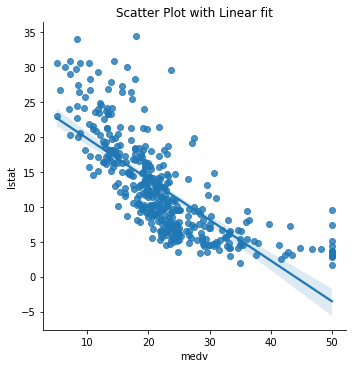

In [85]:
Fig = plt.figure(figsize=(10,5))
sns.lmplot(x='medv', y='lstat', data=boston)
plt.title("Scatter Plot with Linear fit")
plt.show()

<Figure size 720x360 with 0 Axes>

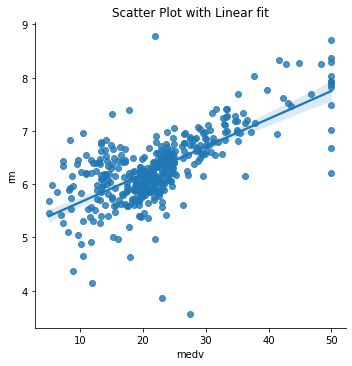

In [86]:
Fig = plt.figure(figsize=(10,5))
sns.lmplot(x='medv', y='rm', data=boston)
plt.title("Scatter Plot with Linear fit")
plt.show()

<Figure size 720x360 with 0 Axes>

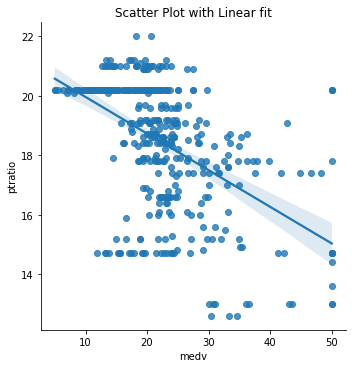

In [88]:
Fig = plt.figure(figsize=(10,5))
sns.lmplot(x='medv', y='ptratio', data=boston)
plt.title("Scatter Plot with Linear fit")
plt.show()

<Figure size 720x360 with 0 Axes>

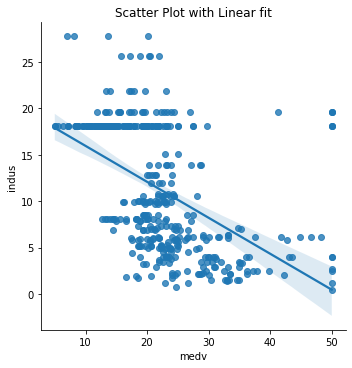

In [84]:
fig = plt.figure(figsize=(10,5))
sns.lmplot(x='medv', y='indus', data=boston)
plt.title("Scatter Plot with Linear fit")
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
# first two plots correspond at what was expected, high correlation and tendancy 

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

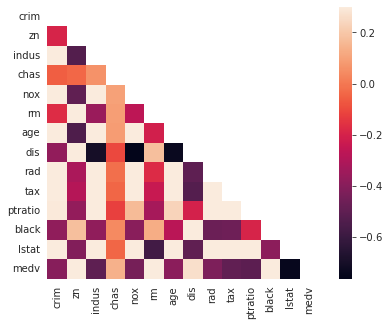

In [89]:
# Your response here
corr = boston.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
    
"""
Variables with high correlation between each other are dis with indus, now and age 
"""

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [95]:
# Your code here
print('median ', boston['medv'].median())
boston['medv'].describe()

median  21.4


count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [110]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_pred):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    return(print(r2_score(y_true, y_pred)))
    # Your code here:

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [104]:
# Your code here
x = boston.drop(['medv'],axis=1)
y = boston['medv']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=5) 

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [141]:
# Five separate RFR here with the given max depths
rfg_model= []
for max_depth in range(2,11,2):
    regr = RandomForestRegressor(max_depth=max_depth, random_state=5)
    regr.fit(x, y)
    rfg_model.append(regr.predict(X_test))


Now, plot the score for each tree on the training set and on the testing set.

In [135]:
# Produce a plot with the score for the testing and training for the different max depths
for i in range(0,5):
    performance_metric(y_test, rfg_model[i])

0.7540515001914072
0.8928012623119752
0.9397728399908267
0.9632266850234718
0.9733115159506941


What do these results tell you about the effect of the depth of the trees on the performance of the model?

# Your response here
depth of trees has on impact on performance of the model, we can see an increase in score with a potential elbow at max depth 8 (smaller increase of performance when we get to max_depth 10)


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

# Your response here
with max_depth 1 the model should suffer from high variance (not precise)
with max depth 10 the model risks to have high biased (very precise but not accurate) 


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [155]:
# Your response here
# best max depth is 8 as seen before
regr = RandomForestRegressor(max_depth=7, random_state=5)
regr.fit(x, y)
y_pred = (regr.predict(X_test))
performance_metric(y_test, y_pred)

0.954852679345632


In [156]:
regr = RandomForestRegressor(max_depth=9, random_state=5)
regr.fit(x, y)
y_pred = (regr.predict(X_test))
performance_metric(y_test, y_pred)

0.9692193124455922


In [159]:
regr = RandomForestRegressor(max_depth=8, random_state=5)
regr.fit(x, y)
y_pred = (regr.predict(X_test))
performance_metric(y_test, y_pred)

0.9632266850234718


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

# Your response here
- I don't think data from 1978 is still relevant today. Also models have to be updated regularly to still be
- yes the features seem to be sufficient to describe a home
- the model has a 96% accuracy and seems robust enough to make consistent predictions
- if the result is directly linked to the features, and only these features, then yes the data would be applicable. The ration of people with or without diabetes would however change since the new data (rural) would differ from the train data (boston)